In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [25]:
df = pd.read_csv("../data/house_data.csv")
df.head()

,Area,Bedrooms,Bathrooms,Location,Age,Price
0,1200,2,1,City,10,4500000
1,1500,3,2,City,8,6200000
2,800,1,1,Suburb,15,2800000
3,1800,3,2,City,5,7500000
4,2000,4,3,City,3,9200000


In [26]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       15 non-null     int64 
 1   Bedrooms   15 non-null     int64 
 2   Bathrooms  15 non-null     int64 
 3   Location   15 non-null     object
 4   Age        15 non-null     int64 
 5   Price      15 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 852.0+ bytes


,Area,Bedrooms,Bathrooms,Age,Price
count,15.000000,15.000000,15.000000,15.000000,1.500000e+01
mean,1473.333333,2.666667,1.866667,7.866667,6.086667e+06
std,437.879087,0.975900,0.743223,4.733870,2.513355e+06
min,800.000000,1.000000,1.000000,1.000000,2.600000e+06
25%,1150.000000,2.000000,1.000000,4.500000,4.000000e+06
50%,1500.000000,3.000000,2.000000,7.000000,6.000000e+06
75%,1750.000000,3.000000,2.000000,11.000000,7.750000e+06
max,2200.000000,4.000000,3.000000,16.000000,1.020000e+07


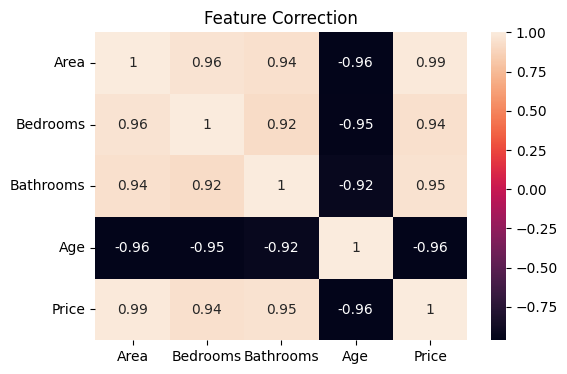

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title("Feature Correction")
plt.show()


In [28]:
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

In [29]:
x = df.drop('Price',axis=1)
y = df['Price']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
model = LinearRegression()
model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [37]:
y_pred = model.predict(x_test)

In [38]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("MAE:", mae)
print("RMSE:",rmse)

MAE: 323690.6751091949
RMSE: 450845.21755550895


In [39]:
new_house = pd.DataFrame({'Area':[1600], 'Bedrooms':[3], 'Bathrooms':[2], 'Age':[5], 'Location_Suburb':[1]})
predicted_price = model.predict(new_house)
print("Predicted Price :", predicted_price[0])

Predicted Price : 6495460.381672677
